# Modelo kNN (Vecinos mas cercanos)

El siguiente codigo es un ejemplo de explotacion de informacion previamente creada de manera aleatoria
en los scripts databases.py y datanormaliztion.py, en este codigo se crea un modelo capaz de clasificar
y crear sugerencia en base a 2 caracteristicas de un conjunto de datos previamente enriquecido.
Se grafican los resultados del modelo resultante y se exporta para su uso dentro del archivo main.py

In [1]:
import sqlite3
import numpy as np
import pickle
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# Leer datos de la tabla centralized_data
conn = sqlite3.connect("ecommerce.db")
cursor = conn.cursor()
cursor.execute("SELECT product_id, feature_1, feature_2 FROM centralized_data")
data = cursor.fetchall()
conn.close()

In [3]:
# Preparar datos para el modelo KNN
product_ids = [row[0] for row in data]
features = np.array([[row[1], row[2]] for row in data])

In [4]:
# Crear y entrenar el modelo KNN
knn = NearestNeighbors(n_neighbors=4, algorithm='auto', metric='euclidean')
knn.fit(features)

NearestNeighbors(metric='euclidean', n_neighbors=4)

In [5]:
# Guardar el modelo entrenado
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

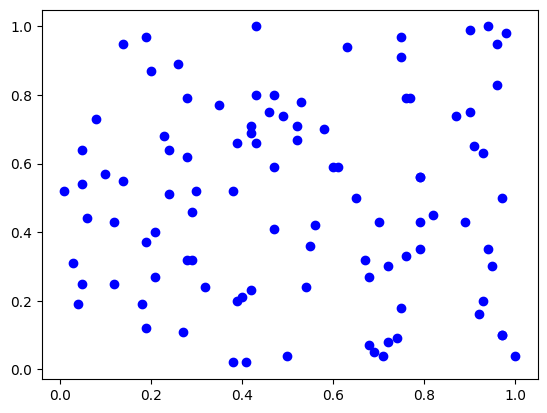

In [6]:
# Visualizar los datos y las conexiones del modelo KNN
fig, ax = plt.subplots()
ax.scatter(features[:, 0], features[:, 1], c='blue', label='Productos')

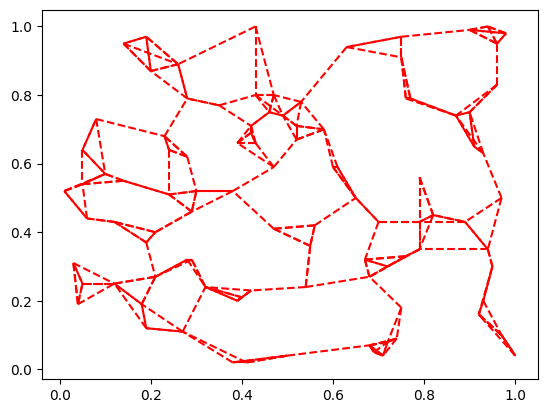

In [7]:

for product_id, feature in zip(product_ids, features):
    nearest_indices = knn.kneighbors([feature], return_distance=False)[0][1:]
    for nearest_index in nearest_indices:
        nearest_feature = features[nearest_index]
        plt.plot([feature[0], nearest_feature[0]], [feature[1], nearest_feature[1]], 'r--')


In [8]:
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("KNN: Relaciones entre productos")
ax.legend()
plt.show()